# Data Preparation

In [1]:
import pandas as pd

import os
 
# Base input path

base_path = '/kaggle/input'
 
# File names to import

file_names = ['Datasets.csv', 'Forums.csv', 'ForumTopics.csv']
 
# Create a dictionary to hold DataFrames

dataframes = {}
 
# Walk through the input directory

for dirname, _, filenames in os.walk(base_path):

    for file in file_names:

        if file in filenames:

            file_path = os.path.join(dirname, file)

            dataframes[file.split('.')[0]] = pd.read_csv(file_path)

            print(f'Loaded {file} into DataFrame.')
 
# Access individual DataFrames

datasets_df = dataframes['Datasets']

forums_df = dataframes['Forums']

forum_topics_df = dataframes['ForumTopics']

/tmp/ipykernel_36/42381242.py:27: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  dataframes[file.split('.')[0]] = pd.read_csv(file_path)


Loaded Datasets.csv into DataFrame.
Loaded Forums.csv into DataFrame.
Loaded ForumTopics.csv into DataFrame.


In [2]:
print("datasets_df Shape:",datasets_df.shape)
print("forums_df Shape:",forums_df.shape)
print("forum_topics_df Shape:",forum_topics_df.shape)

datasets_df Shape: (507497, 16)
forums_df Shape: (567278, 3)
forum_topics_df Shape: (461291, 13)


In [3]:
# Step 1: Group ForumTopics by forumId and count how many topics each forum has
forum_topic_counts = forum_topics_df.groupby('ForumId').size().reset_index(name='TotalForumTopics')
 
if 'TotalForumTopics' in datasets_df.columns:
    datasets_df = datasets_df.drop(columns=['TotalForumTopics'])
 
# Step 2: Merge this count into the datasets_df based on forumId
datasets_df = datasets_df.merge(forum_topic_counts, how='left', on='ForumId')
 
# Step 3: Fill NaN with 0 (for datasets with no forum topics)
datasets_df['TotalForumTopics'] = datasets_df['TotalForumTopics'].fillna(0).astype(int)
 
# Optional: Preview the result
datasets_df.head(15)

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Id,CreatorUserId,OwnerUserId,OwnerOrganizationId,CurrentDatasetVersionId,CurrentDatasourceVersionId,ForumId,Type,CreationDate,LastActivityDate,TotalViews,TotalDownloads,TotalVotes,TotalKernels,Medal,MedalAwardDate,TotalForumTopics
0,26,553913,553913.0,NaN,793501.0,815299.0,1110,Dataset,03/08/2016 22:41:02,02/05/2018,89285,12272,293,144,2.0,08/02/2021,4
1,13,1132983,NaN,4.0,7651.0,7651.0,975,Dataset,12/18/2015 23:16:00,02/06/2018,252849,47457,406,452,2.0,08/05/2021,8
2,14,993,NaN,4.0,827864.0,850525.0,977,Dataset,12/21/2015 19:40:00,02/06/2018,532711,98221,904,495,2.0,06/29/2020,9
3,16,993,NaN,3.0,799881.0,821798.0,984,Dataset,12/28/2015 06:04:45,02/06/2018,112826,24949,142,209,3.0,11/06/2019,5
4,17,993,NaN,3.0,742210.0,762847.0,989,Dataset,01/07/2016 00:38:08,02/06/2018,777954,124908,1117,588,1.0,11/06/2019,13
5,18,500099,NaN,229.0,2157.0,2157.0,993,Dataset,01/08/2016 21:12:10,02/06/2018,1121453,227616,2356,1089,1.0,11/06/2019,17
6,19,1,NaN,7.0,420.0,420.0,997,Dataset,01/12/2016 00:33:31,02/06/2018,2560414,715237,4286,7436,1.0,11/06/2019,32
7,20,866896,NaN,373.0,4275.0,4275.0,999,Dataset,01/13/2016 02:01:43,02/06/2018,513759,78716,1251,547,1.0,11/06/2019,7
8,21,1,NaN,9.0,2159.0,2159.0,1015,Dataset,01/20/2016 16:32:33,02/05/2018,374252,34460,706,199,2.0,11/06/2019,13
9,22,508688,NaN,4.0,2152.0,2152.0,1016,Dataset,01/20/2016 22:51:48,01/17/2018,19299,1295,50,20,NaN,11/06/2019,0


# EDA

**1. Basic information and missing value check**

In [4]:
# Info about columns, datatypes, and nulls
datasets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 507497 entries, 0 to 507496
Data columns (total 17 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Id                          507497 non-null  int64  
 1   CreatorUserId               507497 non-null  int64  
 2   OwnerUserId                 504929 non-null  float64
 3   OwnerOrganizationId         2568 non-null    float64
 4   CurrentDatasetVersionId     507260 non-null  float64
 5   CurrentDatasourceVersionId  507249 non-null  float64
 6   ForumId                     507497 non-null  int64  
 7   Type                        507497 non-null  object 
 8   CreationDate                507497 non-null  object 
 9   LastActivityDate            507497 non-null  object 
 10  TotalViews                  507497 non-null  int64  
 11  TotalDownloads              507497 non-null  int64  
 12  TotalVotes                  507497 non-null  int64  
 13  TotalKernels  

In [5]:
# Descriptive statistics (for all columns)
datasets_df.describe(include='all')

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Id,CreatorUserId,OwnerUserId,OwnerOrganizationId,CurrentDatasetVersionId,CurrentDatasourceVersionId,ForumId,Type,CreationDate,LastActivityDate,TotalViews,TotalDownloads,TotalVotes,TotalKernels,Medal,MedalAwardDate,TotalForumTopics
count,5.074970e+05,5.074970e+05,5.049290e+05,2568.000000,5.072600e+05,5.072490e+05,5.074970e+05,507497,507497,507497,5.074970e+05,507497.000000,507497.000000,507497.000000,21117.000000,29232,507497.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,506444,2851,NaN,NaN,NaN,NaN,NaN,1868,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dataset,09/26/2024 07:06:56,06/21/2024,NaN,NaN,NaN,NaN,NaN,11/06/2019,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,507497,5,5109,NaN,NaN,NaN,NaN,NaN,838,NaN
mean,3.893743e+06,1.100190e+07,1.104608e+07,1250.682632,6.496214e+06,6.653878e+06,4.029869e+06,NaN,NaN,NaN,1.946238e+03,257.449437,4.571205,1.678047,2.874367,NaN,0.057636
std,2.259711e+06,7.258462e+06,7.243565e+06,1274.078892,3.612059e+06,3.744979e+06,2.389498e+06,NaN,NaN,NaN,2.867358e+04,4386.568732,92.578410,34.845181,0.376529,NaN,1.159799
min,6.000000e+00,1.000000e+00,3.680000e+02,2.000000,5.800000e+01,5.800000e+01,7.620000e+02,NaN,NaN,NaN,0.000000e+00,0.000000,0.000000,0.000000,1.000000,NaN,0.000000
25%,1.899875e+06,4.786697e+06,4.844641e+06,265.000000,3.159078e+06,3.208569e+06,1.923223e+06,NaN,NaN,NaN,4.300000e+01,3.000000,0.000000,0.000000,3.000000,NaN,0.000000
50%,3.851762e+06,1.015907e+07,1.022414e+07,959.000000,6.749370e+06,6.834416e+06,3.926836e+06,NaN,NaN,NaN,1.440000e+02,8.000000,0.000000,0.000000,3.000000,NaN,0.000000
75%,5.816288e+06,1.650777e+07,1.653491e+07,1606.000000,9.596287e+06,9.817818e+06,6.028093e+06,NaN,NaN,NaN,9.130000e+02,28.000000,1.000000,1.000000,3.000000,NaN,0.000000


| Row Name   | Explanation                                                                    |
| ---------- | ------------------------------------------------------------------------------ |
| **count**  | Number of non-missing (non-NaN, non-None) values in the column.                |
| **unique** | Number of unique values in the column (only for categorical/string columns).   |
| **top**    | The most frequent value (mode) in the column (for categorical/string columns). |
| **freq**   | Frequency of the most frequent value (how many times "top" appears).           |
| **mean**   | Average value (only for numeric columns).                                      |
| **std**    | Standard deviation, measures spread of the values (only for numeric columns).  |
| **min**    | Minimum value (only for numeric columns).                                      |
| **25%**    | 25th percentile (the value below which 25% of the data fall, numeric only).    |
| **50%**    | 50th percentile (the median, numeric only).                                    |
| **75%**    | 75th percentile (the value below which 75% of the data fall, numeric only).    |
| **max**    | Maximum value (only for numeric columns).                                      |


In [6]:
# Check for missing values percentages
(datasets_df.isnull().sum() / len(datasets_df)) * 100


Id                             0.000000
CreatorUserId                  0.000000
OwnerUserId                    0.506013
OwnerOrganizationId           99.493987
CurrentDatasetVersionId        0.046700
CurrentDatasourceVersionId     0.048867
ForumId                        0.000000
Type                           0.000000
CreationDate                   0.000000
LastActivityDate               0.000000
TotalViews                     0.000000
TotalDownloads                 0.000000
TotalVotes                     0.000000
TotalKernels                   0.000000
Medal                         95.838990
MedalAwardDate                94.239966
TotalForumTopics               0.000000
dtype: float64

**2. Target variable (Y) distribution analysis**

In [7]:
y_cols = ['TotalViews', 'TotalVotes', 'TotalForumTopics']

*2.1. Distribution & Box Plot*

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


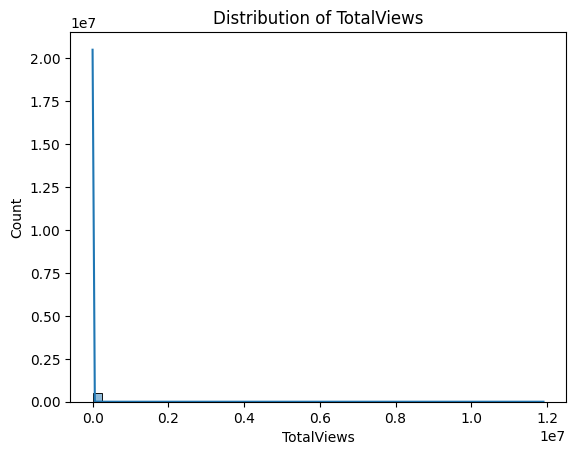

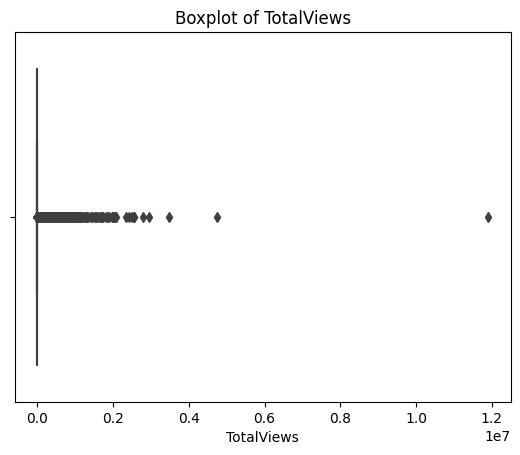

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


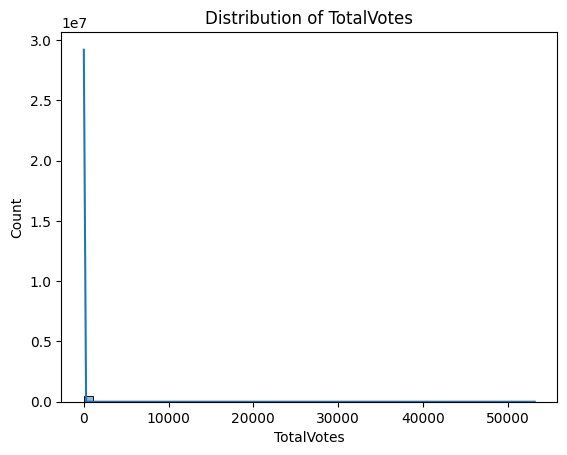

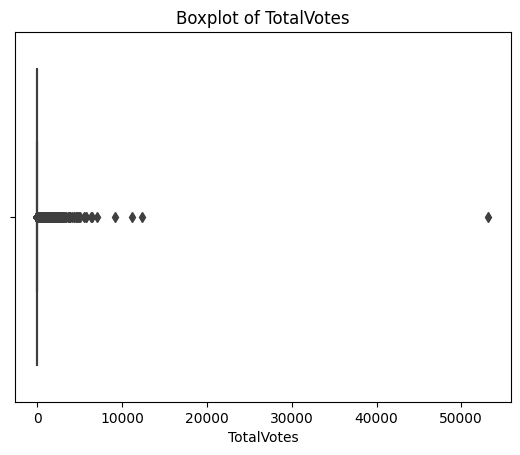

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


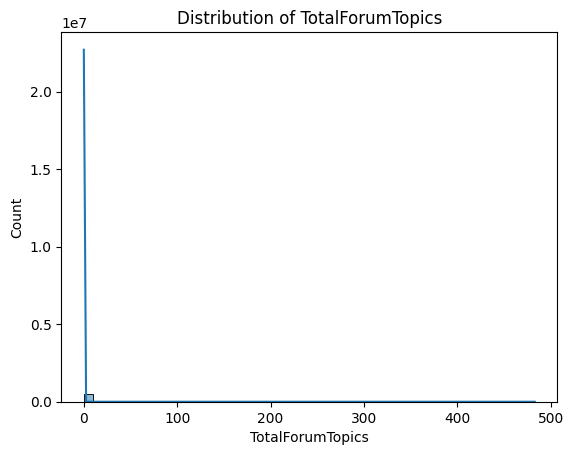

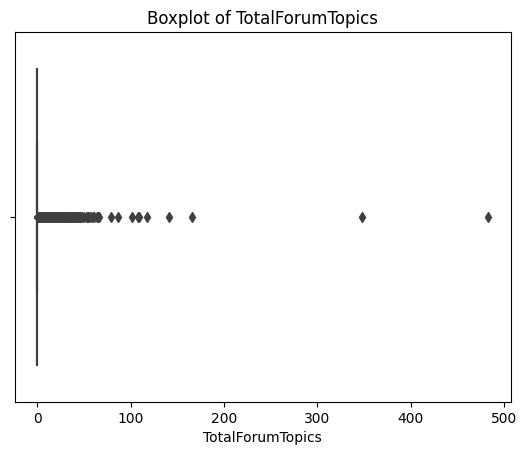

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
for col in ['TotalViews', 'TotalVotes', 'TotalForumTopics']:
    plt.figure()
    sns.histplot(datasets_df[col], bins=50, kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

    plt.figure()
    sns.boxplot(x=datasets_df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

*2.2. Correlation Matrix*

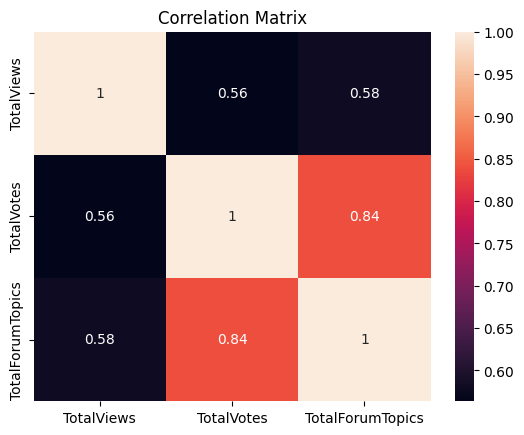

In [9]:
corr = datasets_df[['TotalViews', 'TotalVotes', 'TotalForumTopics']].corr()
sns.heatmap(corr, annot=True)
plt.title('Correlation Matrix')
plt.show()

*2.3. Logarithmic transformation*

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


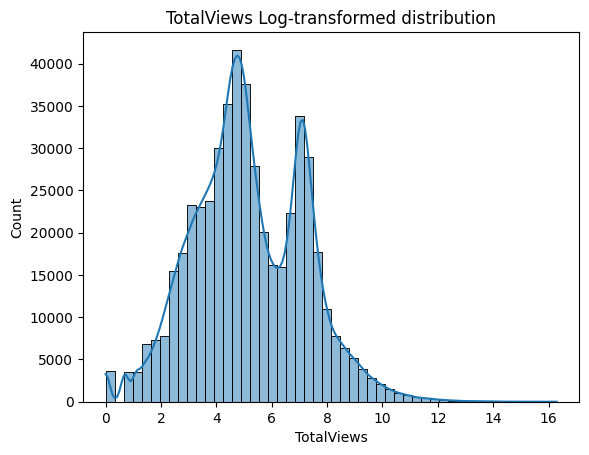

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


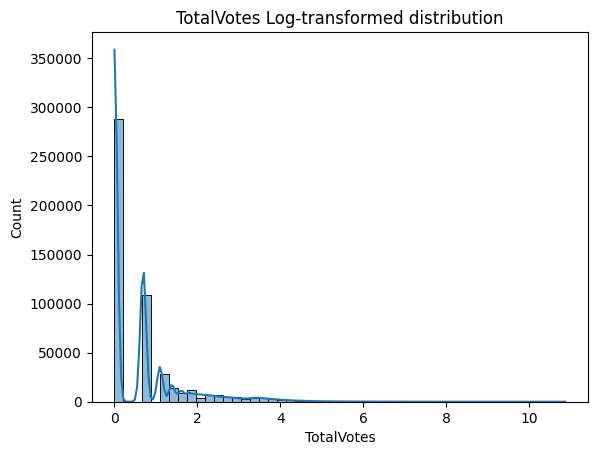

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


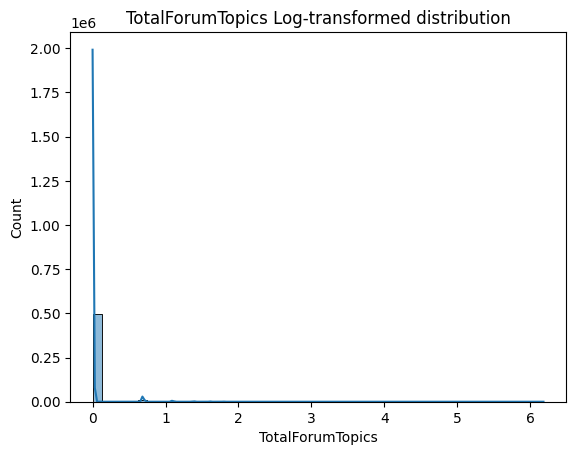

In [10]:
import numpy as np

for col in y_cols:
    plt.figure()
    sns.histplot(np.log1p(datasets_df[col]), bins=50, kde=True)
    plt.title(f'{col} Log-transformed distribution')
    plt.show()

**3. Feature (X) distribution analysis**

In [11]:
num_cols = [
    'TotalDownloads', 'TotalKernels', 'Medal',
    'OwnerUserId', 'OwnerOrganizationId',
    'CurrentDatasetVersionId', 'CurrentDatasourceVersionId'
]

cat_cols = [
    'Type'
]

time_cols = ['CreationDate', 'LastActivityDate', 'MedalAwardDate']

*3.1 Numerical features*

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


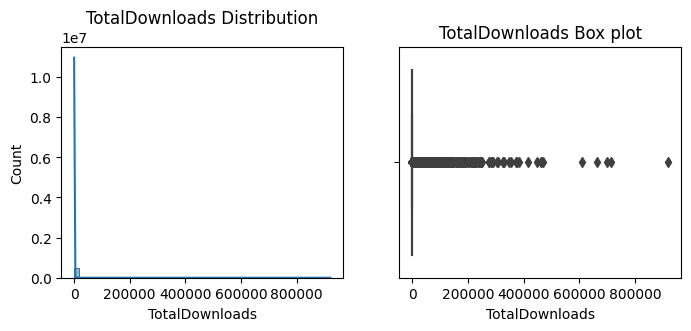

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


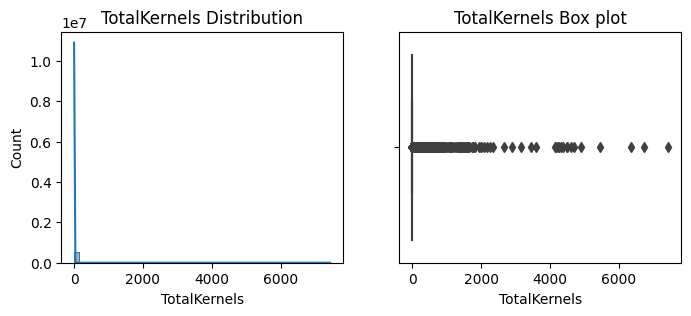

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


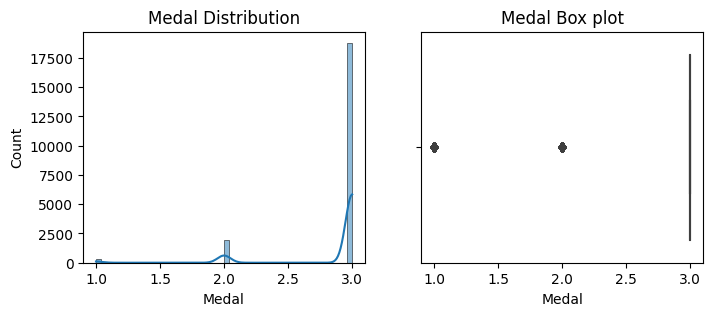

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


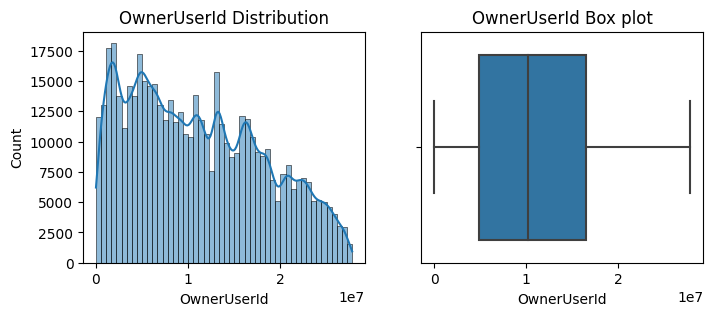

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


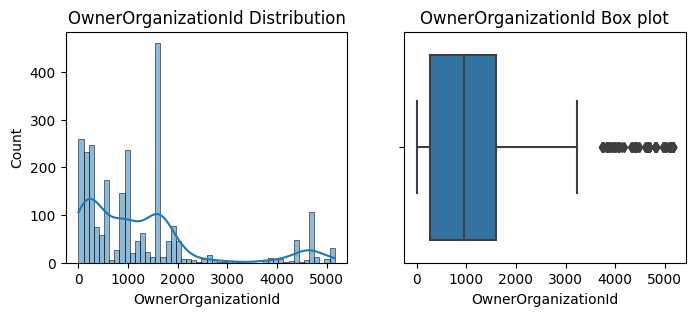

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


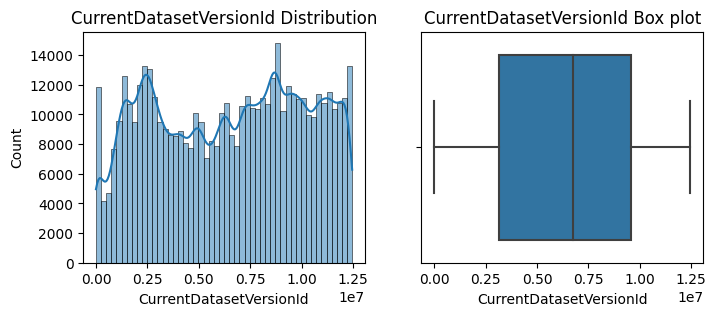

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


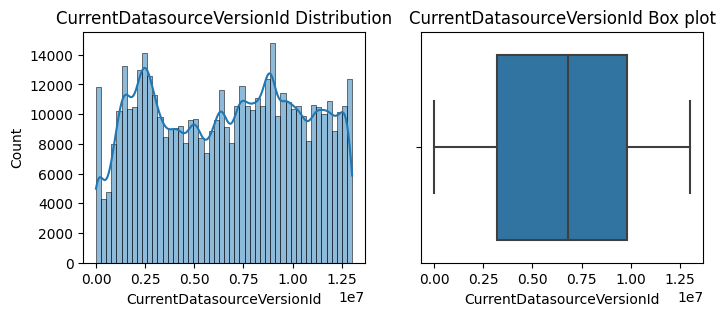

In [12]:
for col in num_cols:
    if col in datasets_df.columns:
        plt.figure(figsize=(8,3))
        plt.subplot(1,2,1)
        sns.histplot(datasets_df[col].dropna(), bins=50, kde=True)
        plt.title(f'{col} Distribution')
        plt.subplot(1,2,2)
        sns.boxplot(x=datasets_df[col].dropna())
        plt.title(f'{col} Box plot')
        plt.show()

*3.2. Category Statistics*

Type Number of each category:
 Type
Dataset    507497
Name: count, dtype: int64


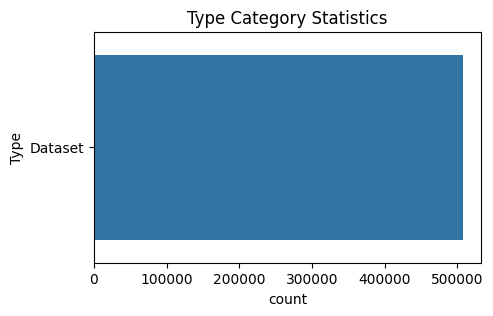

In [13]:
for col in cat_cols:
    if col in datasets_df.columns:
        print(f"{col} Number of each category:\n", datasets_df[col].value_counts())
        plt.figure(figsize=(5,3))
        sns.countplot(y=col, data=datasets_df, order=datasets_df[col].value_counts().index)
        plt.title(f'{col} Category Statistics')
        plt.show()

*3.3. Missing and unique value analysis*

In [14]:
print("Missing values ​​for features：\n", datasets_df[num_cols + cat_cols].isnull().sum(),"\n")

for col in num_cols + cat_cols:
    if col in datasets_df.columns:
        print(f"{col} Number of unique values: {datasets_df[col].nunique()}")

Missing values ​​for features：
 TotalDownloads                     0
TotalKernels                       0
Medal                         486380
OwnerUserId                     2568
OwnerOrganizationId           504929
CurrentDatasetVersionId          237
CurrentDatasourceVersionId       248
Type                               0
dtype: int64 

TotalDownloads Number of unique values: 7588
TotalKernels Number of unique values: 487
Medal Number of unique values: 3
OwnerUserId Number of unique values: 187182
OwnerOrganizationId Number of unique values: 387
CurrentDatasetVersionId Number of unique values: 507260
CurrentDatasourceVersionId Number of unique values: 507249
Type Number of unique values: 1


**4. Feature Correlation and Extreme Value Analysis**

*4.1. Relationship between features and targets (X vs Y)*

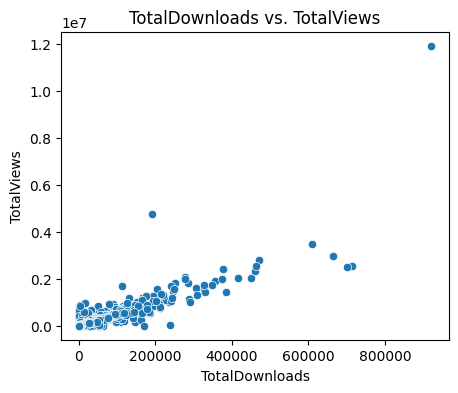

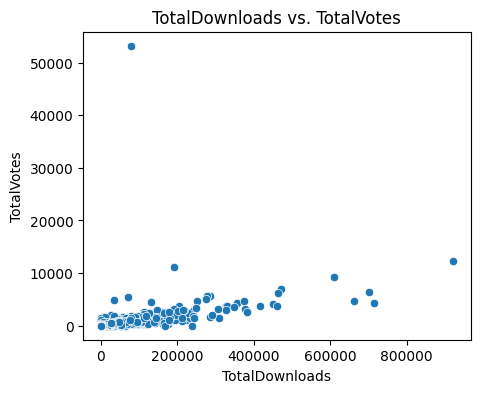

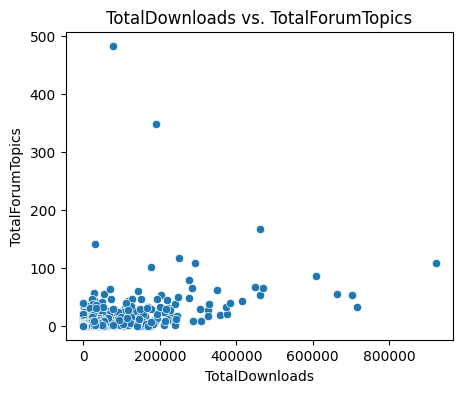

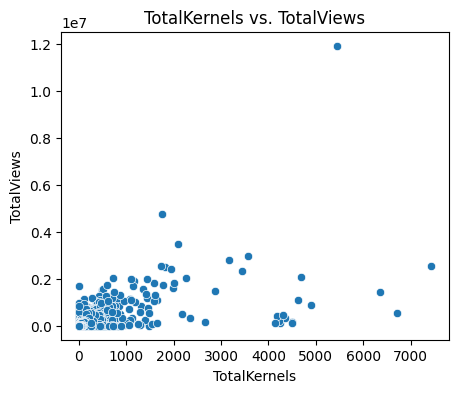

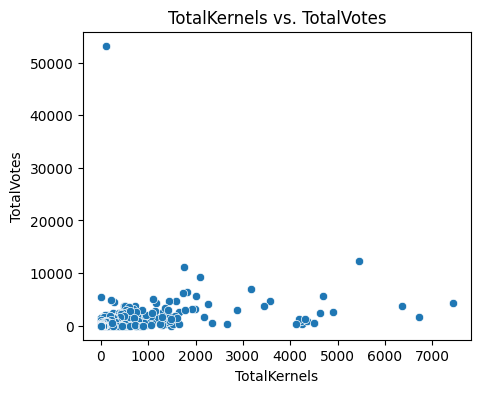

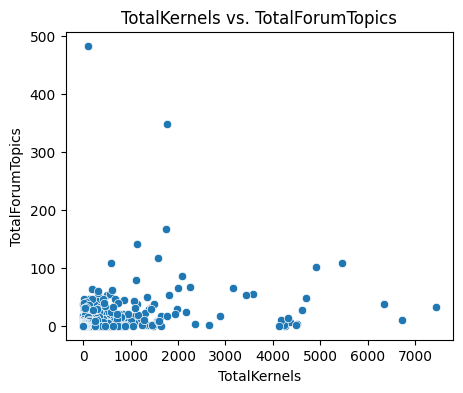

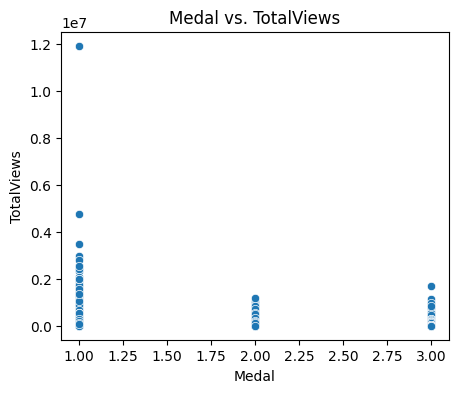

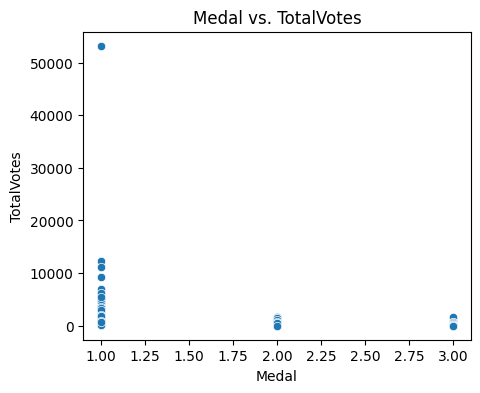

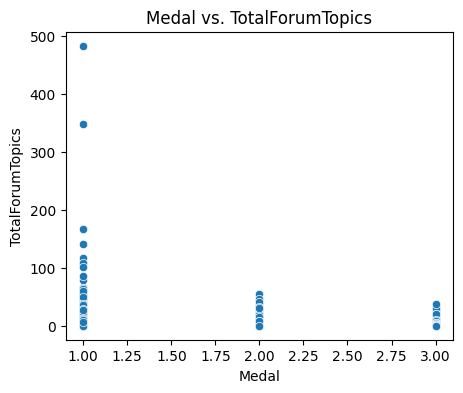

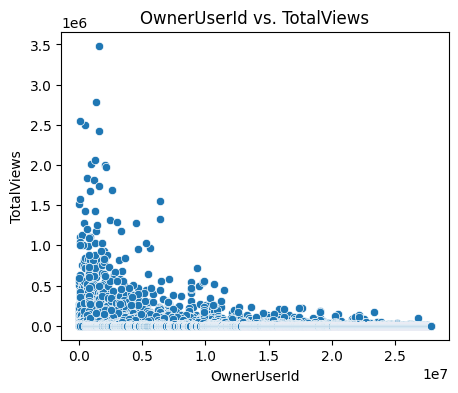

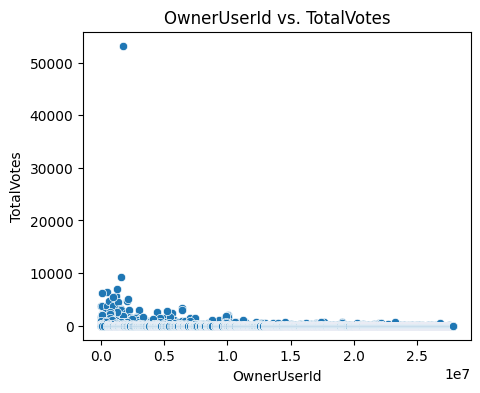

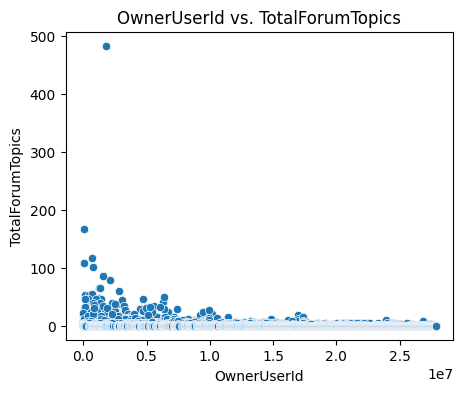

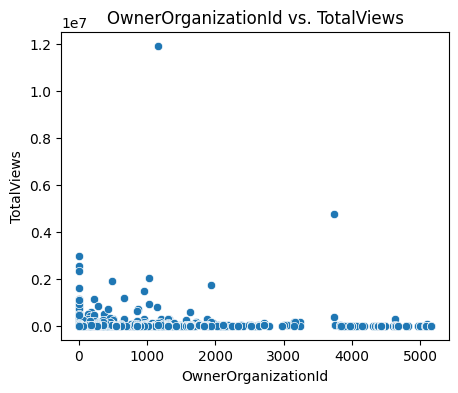

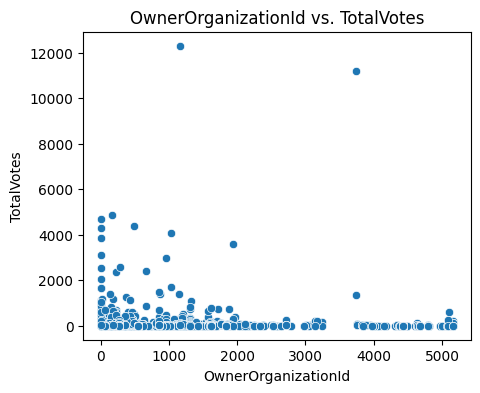

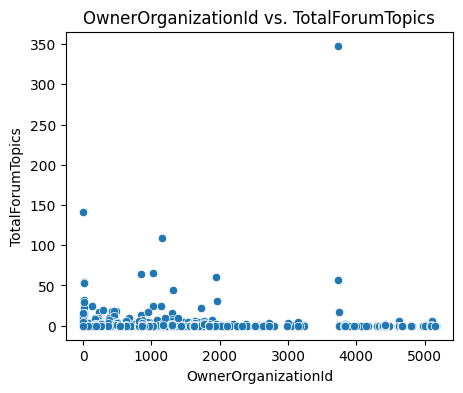

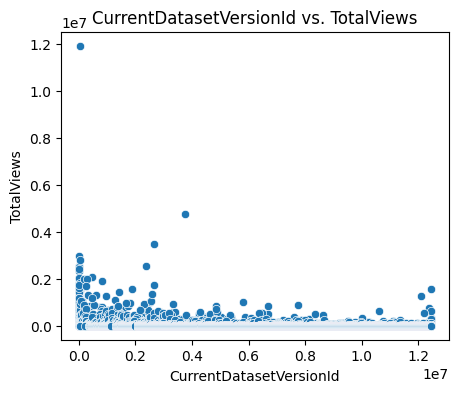

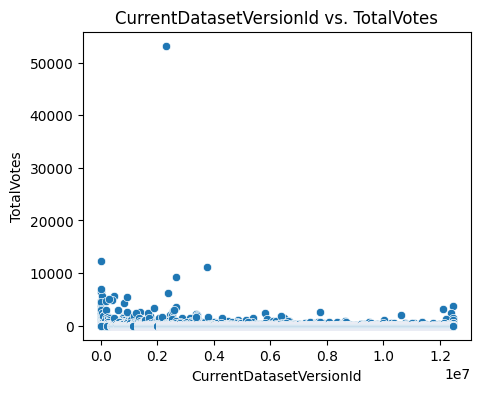

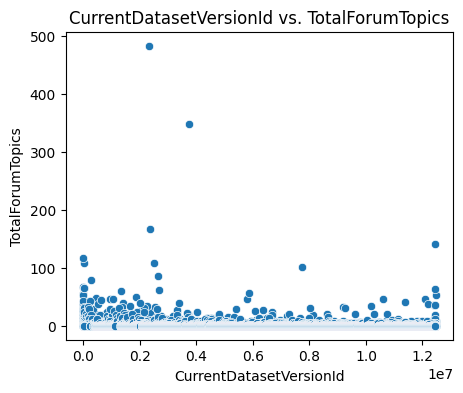

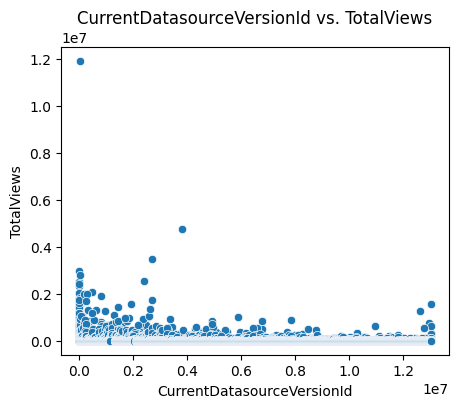

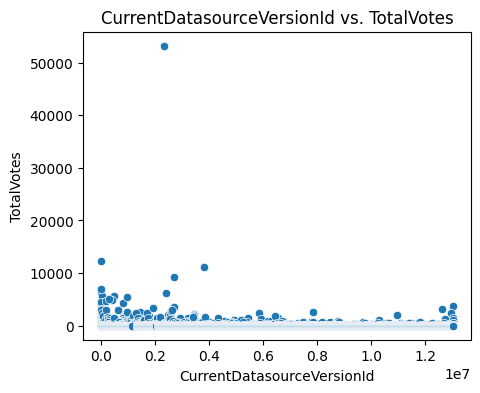

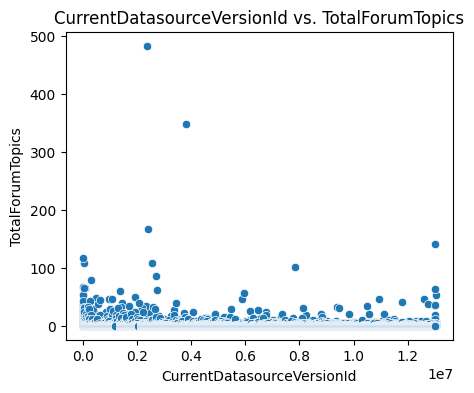

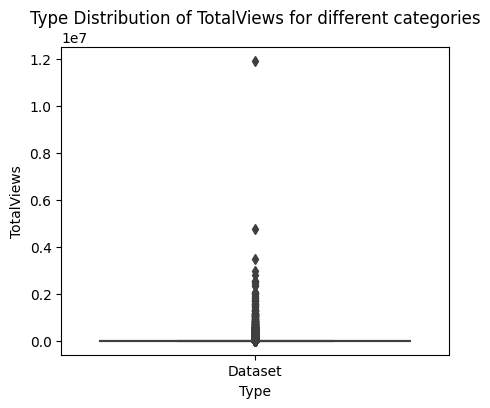

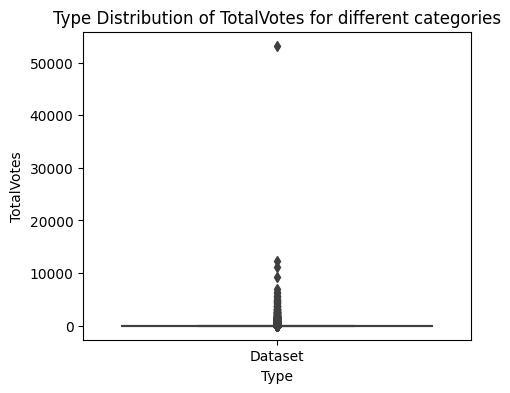

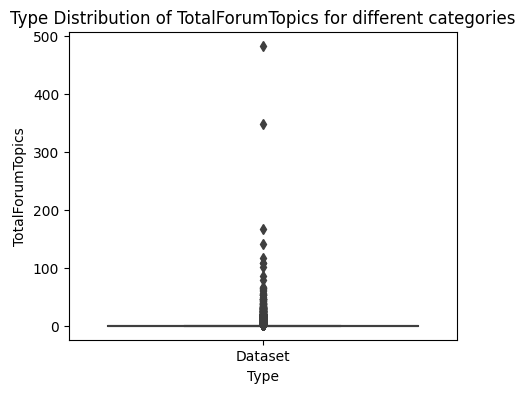

In [15]:
for x in num_cols:
    if x in datasets_df.columns:
        for y in y_cols:
            plt.figure(figsize=(5,4))
            sns.scatterplot(x=x, y=y, data=datasets_df)
            plt.title(f'{x} vs. {y}')
            plt.show()
for x in cat_cols:
    if x in datasets_df.columns:
        for y in y_cols:
            plt.figure(figsize=(5,4))
            sns.boxplot(x=x, y=y, data=datasets_df)
            plt.title(f'{x} Distribution of {y} for different categories')
            plt.show()

*4.2. Correlation between features (x-x, x-y)*

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


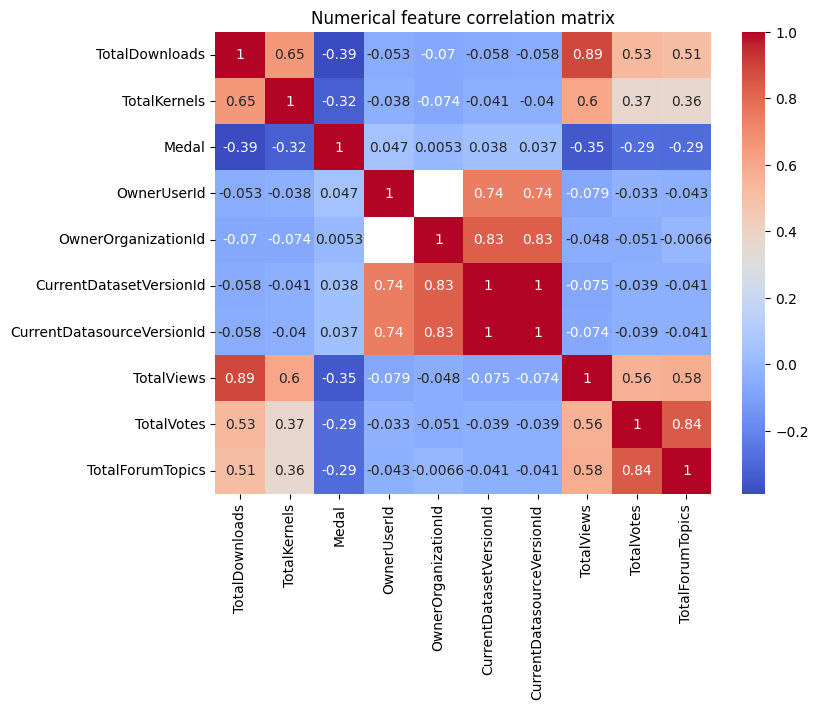

In [16]:
corr = datasets_df[num_cols + y_cols].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Numerical feature correlation matrix')
plt.show()

*4.3. Outlier and extreme value detection*

In [17]:
for col in num_cols + y_cols:
    if col in datasets_df.columns:
        print(f"{col} Maximum/Minimum: {datasets_df[col].max()}/{datasets_df[col].min()}")

TotalDownloads Maximum/Minimum: 920905/0
TotalKernels Maximum/Minimum: 7436/0
Medal Maximum/Minimum: 3.0/1.0
OwnerUserId Maximum/Minimum: 27835001.0/368.0
OwnerOrganizationId Maximum/Minimum: 5161.0/2.0
CurrentDatasetVersionId Maximum/Minimum: 12461529.0/58.0
CurrentDatasourceVersionId Maximum/Minimum: 13035218.0/58.0
TotalViews Maximum/Minimum: 11907658/0
TotalVotes Maximum/Minimum: 53189/0
TotalForumTopics Maximum/Minimum: 483/0


# DATA PRE-PROCESSING

In [18]:
df_before_preprocessing = datasets_df



# Drop columns with >50% missing values
high_null_cols = datasets_df.columns[datasets_df.isnull().mean() > 0.5]
print('Columns with >50% missing values:',high_null_cols)
datasets_df = datasets_df.loc[:, datasets_df.isnull().mean() < 0.5]

# Drop columns with only one unique value
single_value_cols = [col for col in datasets_df.columns if datasets_df[col].nunique() == 1]
print('Columns with only one unique value:',single_value_cols)
datasets_df = datasets_df.loc[:, datasets_df.nunique() > 1]

# Drop known irrelevant columns
datasets_df.drop(columns=['Id'], inplace=True, errors='ignore')
datasets_df.head()


Columns with >50% missing values: Index(['OwnerOrganizationId', 'Medal', 'MedalAwardDate'], dtype='object')
Columns with only one unique value: ['Type']


/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,CreatorUserId,OwnerUserId,CurrentDatasetVersionId,CurrentDatasourceVersionId,ForumId,CreationDate,LastActivityDate,TotalViews,TotalDownloads,TotalVotes,TotalKernels,TotalForumTopics
0,553913,553913.0,793501.0,815299.0,1110,03/08/2016 22:41:02,02/05/2018,89285,12272,293,144,4
1,1132983,NaN,7651.0,7651.0,975,12/18/2015 23:16:00,02/06/2018,252849,47457,406,452,8
2,993,NaN,827864.0,850525.0,977,12/21/2015 19:40:00,02/06/2018,532711,98221,904,495,9
3,993,NaN,799881.0,821798.0,984,12/28/2015 06:04:45,02/06/2018,112826,24949,142,209,5
4,993,NaN,742210.0,762847.0,989,01/07/2016 00:38:08,02/06/2018,777954,124908,1117,588,13


In [19]:
import pandas as pd

# Convert to datetime
datasets_df['CreationDate'] = pd.to_datetime(datasets_df['CreationDate'], errors='coerce')
datasets_df['LastActivityDate'] = pd.to_datetime(datasets_df['LastActivityDate'], errors='coerce')

# Create ActivityDuration in days
datasets_df['ActivityDuration'] = (datasets_df['LastActivityDate'] - datasets_df['CreationDate']).dt.days

# Handle invalid durations: replace negative values with median
median_duration = datasets_df.loc[datasets_df['ActivityDuration'] >= 0, 'ActivityDuration'].median()

datasets_df.loc[datasets_df['ActivityDuration'] < 0, 'ActivityDuration'] = median_duration

# Drop original date columns
datasets_df.drop(columns=['CreationDate', 'LastActivityDate'], inplace=True)

In [20]:
num_cols = datasets_df.select_dtypes(include='number').columns
fill_dict = {col: datasets_df[col].median() for col in num_cols}
datasets_df.fillna(value=fill_dict, inplace=True)

In [21]:
for col in num_cols:
    Q1 = datasets_df[col].quantile(0.25)
    Q3 = datasets_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    datasets_df = datasets_df[(datasets_df[col] >= lower) & (datasets_df[col] <= upper)]

In [22]:
# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()
# datasets_df_scaled = scaler.fit_transform(datasets_df[num_cols])

In [23]:
X = datasets_df.drop(columns=y_cols)
y = datasets_df[y_cols]

In [24]:
from sklearn.model_selection import train_test_split

# First split: Train+Val (80%) and Test (20%)
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Second split: Train (70%) and Val (10%)
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.125, random_state=42
)
# 0.125 because 0.125 * 80% = 10%

In [25]:
print("Train shape:", X_train.shape, y_train.shape)
print("Validation shape:", X_val.shape, y_val.shape)
print("Test shape:", X_test.shape, y_test.shape)

Train shape: (260424, 8) (260424, 3)
Validation shape: (37204, 8) (37204, 3)
Test shape: (74408, 8) (74408, 3)


# Model Training

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Define and train model
lr_model = MultiOutputRegressor(LinearRegression())
lr_model.fit(X_train, y_train)

# Predict
y_val_pred_lr = lr_model.predict(X_val)
y_test_pred_lr = lr_model.predict(X_test)

# Evaluate
print("🔸 Linear Regression Evaluation:")
for i in range(3):
    print(f"Output {i+1} - "
          f"Val MSE: {mean_squared_error(y_val.iloc[:, i], y_val_pred_lr[:, i]):.4f}, "
          f"Test MSE: {mean_squared_error(y_test.iloc[:, i], y_test_pred_lr[:, i]):.4f}, "
          f"Test R²: {r2_score(y_test.iloc[:, i], y_test_pred_lr[:, i]):.4f}")


🔸 Linear Regression Evaluation:
Output 1 - Val MSE: 55807.9570, Test MSE: 55697.9637, Test R²: 0.6958
Output 2 - Val MSE: 0.2153, Test MSE: 0.2116, Test R²: 0.3047
Output 3 - Val MSE: 0.0000, Test MSE: 0.0000, Test R²: 1.0000


In [28]:
from sklearn.ensemble import RandomForestRegressor

rf_model = MultiOutputRegressor(RandomForestRegressor(n_estimators=100, random_state=42))
rf_model.fit(X_train, y_train)

y_val_pred_rf = rf_model.predict(X_val)
y_test_pred_rf = rf_model.predict(X_test)

print("🔸 Random Forest Regressor Evaluation:")
for i in range(3):
    print(f"Output {i+1} - "
          f"Val MSE: {mean_squared_error(y_val.iloc[:, i], y_val_pred_rf[:, i]):.4f}, "
          f"Test MSE: {mean_squared_error(y_test.iloc[:, i], y_test_pred_rf[:, i]):.4f}, "
          f"Test R²: {r2_score(y_test.iloc[:, i], y_test_pred_rf[:, i]):.4f}")


🔸 Random Forest Regressor Evaluation:
Output 1 - Val MSE: 24981.1187, Test MSE: 24872.3486, Test R²: 0.8641
Output 2 - Val MSE: 0.1789, Test MSE: 0.1774, Test R²: 0.4172
Output 3 - Val MSE: 0.0000, Test MSE: 0.0000, Test R²: 1.0000


In [29]:
from xgboost import XGBRegressor

xgb_model = MultiOutputRegressor(XGBRegressor(n_estimators=100, random_state=42))
xgb_model.fit(X_train, y_train)

y_val_pred_xgb = xgb_model.predict(X_val)
y_test_pred_xgb = xgb_model.predict(X_test)

print("🔸 XGBoost Regressor Evaluation:")
for i in range(3):
    print(f"Output {i+1} - "
          f"Val MSE: {mean_squared_error(y_val.iloc[:, i], y_val_pred_xgb[:, i]):.4f}, "
          f"Test MSE: {mean_squared_error(y_test.iloc[:, i], y_test_pred_xgb[:, i]):.4f}, "
          f"Test R²: {r2_score(y_test.iloc[:, i], y_test_pred_xgb[:, i]):.4f}")


🔸 XGBoost Regressor Evaluation:
Output 1 - Val MSE: 23925.1260, Test MSE: 23812.8788, Test R²: 0.8699
Output 2 - Val MSE: 0.1832, Test MSE: 0.1800, Test R²: 0.4085
Output 3 - Val MSE: 0.0000, Test MSE: 0.0000, Test R²: 1.0000


2025-07-14 19:51:50.964333: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1752522711.433563      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1752522711.549471      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-07-14 19:52:08.892097: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call 

Epoch 1/10
8139/8139 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - loss: 18398.5605 - mae: 42.0370 - val_loss: 9690.4541 - val_mae: 29.9357
Epoch 2/10
8139/8139 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - loss: 9533.6191 - mae: 29.8158 - val_loss: 9257.3018 - val_mae: 29.2196
Epoch 3/10
8139/8139 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - loss: 9215.0967 - mae: 29.3129 - val_loss: 8920.0830 - val_mae: 28.6051
Epoch 4/10
8139/8139 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - loss: 8910.1211 - mae: 28.6679 - val_loss: 8904.5801 - val_mae: 28.6479
Epoch 5/10
8139/8139 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - loss: 8896.3857 - mae: 28.5327 - val_loss: 8738.6729 - val_mae: 28.4409
Epoch 6/10
8139/8139 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - loss: 8822.6416 - mae: 28.5299 - val_loss: 8688.6416 - val_mae: 28.3047
Epoch 7/10
8139/8139 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - loss: 8673.3105 - mae: 28.3050 - val_loss: 8705.1992 - val_mae: 28.4020
Epoch 8/10
8139/8139 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - loss: 8638.8789 - mae: 28.3386 - val_lo

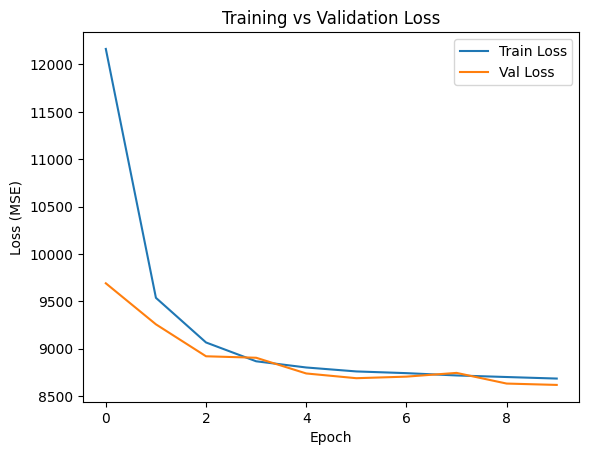

In [30]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# 1. Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# 2. Build the model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(64, activation='relu'),
    Dense(3)  # Output layer for 3 continuous targets
])

# 3. Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# 4. Early stopping to avoid overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# 5. Train the model
history = model.fit(
    X_train_scaled, y_train,
    validation_data=(X_val_scaled, y_val),
    epochs=10,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

# 6. Evaluate on test set
y_test_pred = model.predict(X_test_scaled)

print("🔸 TensorFlow Keras Model Evaluation:")
for i in range(3):
    print(f"Output {i+1} - "
          f"Test MSE: {mean_squared_error(y_test.iloc[:, i], y_test_pred[:, i]):.4f}, "
          f"Test R²: {r2_score(y_test.iloc[:, i], y_test_pred[:, i]):.4f}")

# 7. Optional: Plot training/validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss (MSE)")
plt.legend()
plt.title("Training vs Validation Loss")
plt.show()
